# Fast overview

## Duration

In [8]:
import soundfile as sf
import glob
import os
import matplotlib.pyplot as plt

In [2]:
sw_path = "/run/media/poulpos/PIGS-KU-BU1/Soundwel Dataset - Audio and Spectrograms/"

In [9]:
durations = []
for file in glob.glob("*.wav", root_dir=sw_path):
    sf_file = sf.SoundFile(os.path.join(sw_path, file))
    durations.append(sf_file.frames / sf_file.samplerate)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f98e2aadc60>],
 'cmeans': <matplotlib.collections.LineCollection at 0x7f98e0302da0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f98e08f0a30>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f98e08f0d90>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f98e08f10f0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f98e08f1450>}

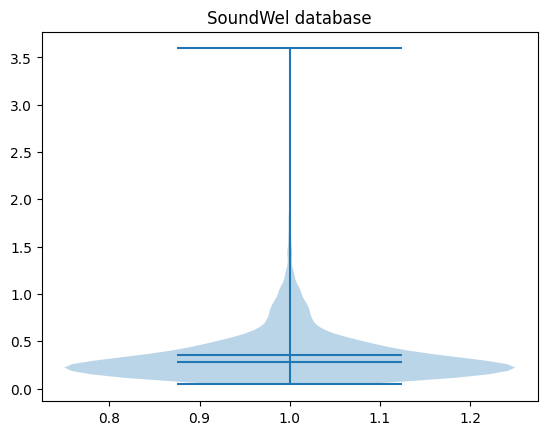

In [10]:
fig1, ax1 = plt.subplots()
ax1.set_title('SoundWel database')
ax1.violinplot(durations, showmeans=True, showmedians=True)

## ...vs call frequency

In [ ]:
import pandas as pd

monitoring_file = "/home/poulpos/pigs-documentary/data/soundwel.csv"

df = pd.read_csv(monitoring_file)

In [6]:
View(df)

NameError: name 'View' is not defined

In [9]:
df.columns

Index(['Unnamed: 0', 'Team', 'RecordingSite', 'HousingGroup', 'LitterID',
       'PigID', 'TestGrpID', 'Date', 'AudioFileName', 'AgeCategory', 'Sex',
       'Context', 'ContextCategory', 'CallType', 'Valence', 'Q25', 'Q50',
       'Q75', 'Fpeak', 'Dur', 'AMVar', 'AMRate', 'AMExtent', 'Harmonicity',
       'WienEntrMean', 'global_filename'],
      dtype='object')

In [17]:
type(df.loc[1].Date)

str

### Once

In [5]:
def get_filename(row):
    concat = row.Team + row.RecordingSite + row.Context + row.AudioFileName
    return concat.replace("_", "").replace("-", "")

In [6]:
df["global_filename"] = df.apply(get_filename, axis=1)

In [7]:
df.to_csv(monitoring_file)

### Quick approach

<Axes: title={'center': 'Dur'}, xlabel='[CallType]'>

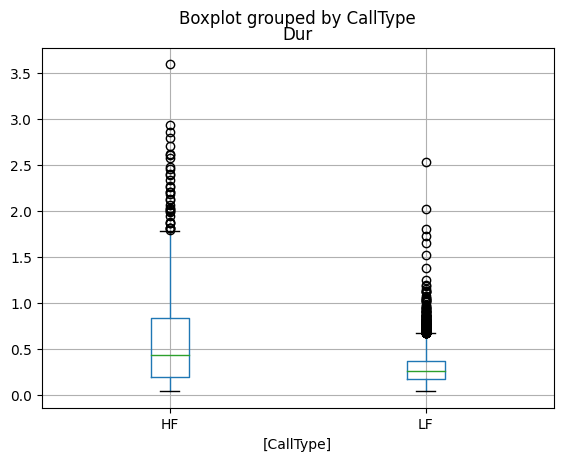

In [34]:
df[["Dur", "CallType"]].boxplot(by='CallType')

<Axes: title={'center': 'Q75'}, xlabel='[CallType]'>

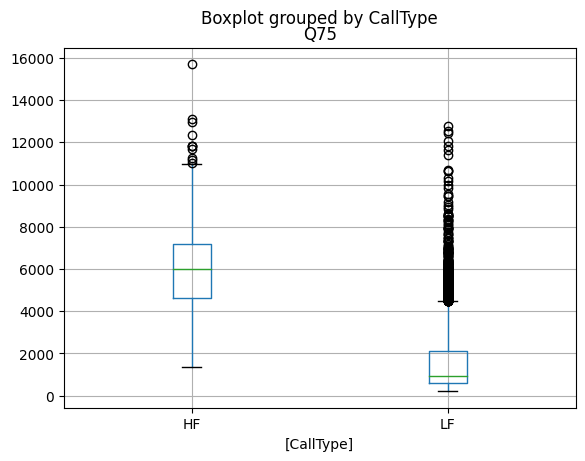

In [38]:
df[["Q75", "CallType"]].boxplot(by='CallType')

<Axes: title={'center': 'Q25'}, xlabel='[CallType]'>

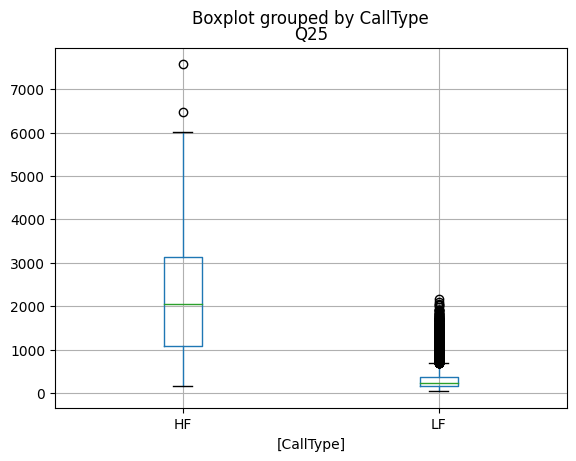

In [10]:
df[["Q25", "CallType"]].boxplot(by='CallType')

In [11]:
df['spread'] = df['Q75'] - df['Q25']

<Axes: title={'center': 'spread'}, xlabel='[CallType]'>

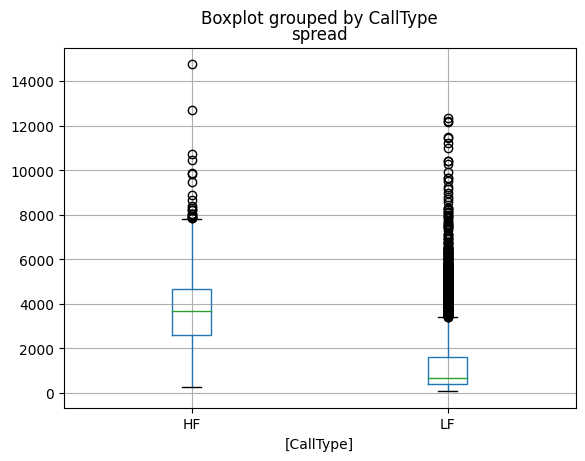

In [12]:
df[["spread", "CallType"]].boxplot(by='CallType')

<Axes: >

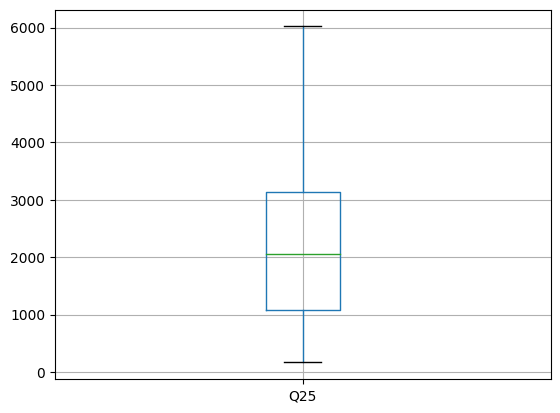

In [19]:
df[df['CallType'] == 'HF'][['Q25']].boxplot(showfliers=False)

<Axes: >

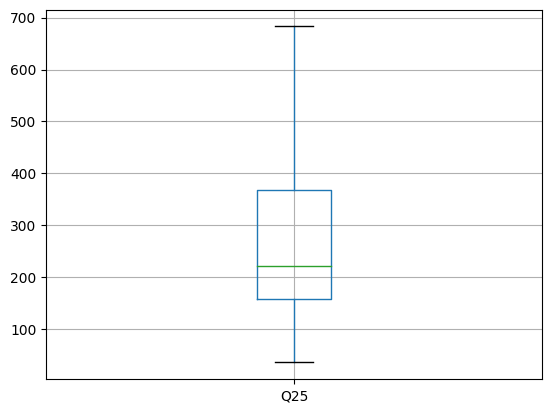

In [22]:
df[df['CallType'] == 'LF'][['Q25']].boxplot(showfliers=False)

In [12]:
len(df[df.CallType == 'HF'])

1901

In [13]:
len(df[df.CallType == 'LF'])

5513

In [25]:
df[df.CallType == 'HF']['Dur'].sum()

1064.3829999999998

In [26]:
df[df.CallType == 'LF']['Dur'].sum()

1622.594

In [ ]:
import math
split = {'HF': 0.43, 'LF': 0.26}
def get_n(row):
    return math.ceil(row.Dur/split[row.CallType])

df['n_samples'] = df.apply(get_n, axis=1)

In [39]:
df[df.CallType == 'LF']['n_samples'].sum()

8889

In [50]:
df[df.CallType == 'HF']['n_samples'].sum()

3477

In [49]:
df[["CallType", 'AudioFileName', "Dur", "n_samples"]].head(50)

CallType                   AudioFileName    Dur  n_samples
0        HF         s99p09_sham-cut-007.wav  0.579          2
1        HF         s99p09_sham-cut-006.wav  0.503          2
2        HF         s99p09_sham-cut-004.wav  0.397          1
3        LF           20032014_VT5_HFm2.wav  0.361          2
4        HF          06022014_VT14_HFs4.wav  0.089          1
5        HF         s99p09_sham-cut-010.wav  0.268          1
6        LF           20032014_VT5_HFm4.wav  0.399          2
7        HF          05052014_VT13_HFs4.wav  0.072          1
8        LF           20032014_VT5_HFm1.wav  0.305          2
9        HF         s99p09_sham-cut-008.wav  0.311          1
10       LF           20032014_VT5_HFm3.wav  0.305          2
11       HF  Pr67_Sele11_isolace2_1_481.wav  0.128          1
12       LF           01052014_VT4_HFm3.wav  0.544          3
13       LF          07072014_VT15_HFm2.wav  0.310          2
14       LF           24032014_VT9_HFm5.wav  0.172          1
15       LF           14042014_VT8_HFm5.wav  0.360          2
16       LF           01052014_VT4_HFm5.wav  0.588          3
17       LF           20032014_VT5_HFm5.wav  0.316          2
18       LF        Pr47_Sele08Na_8min_5.wav  0.075          1
19       LF           01052014_VT2_HFm2.wav  0.449          2
20       LF           CrushSow3Pig11_10.WAV  0.205          1
21       HF          06022014_VT14_HFs2.wav  0.117          1
22       LF           20032014_VT5_HFm6.wav  0.422          2
23       LF           01052014_VT2_LFs6.wav  0.422          2
24       LF          07072014_VT15_HFm4.wav  0.432          2
25       HF           20032014_VT2_HFm2.wav  0.549          2
26       LF           01052014_VT7_HFm6.wav  0.372          2
27       HF    Pr08_Sele5_isolace1_1_64.wav  0.192          1
28       LF           24032014_VT9_HFm1.wav  0.211          1
29       LF           27022014_VT2_HFm2.wav  0.355          2
30       LF           01052014_VT5_HFm2.wav  0.455          2
31       HF    Pr55_Sele1_isolace1_1_86.wav  0.069          1
32       LF          01052014_VT15_HFm1.wav  0.494          2
33       LF           05052014_VT7_HFm3.wav  0.161          1
34       HF          05052014_VT13_HFm4.wav  0.222          1
35       LF           05052014_VT7_HFm6.wav  0.482          2
36       HF            IsolSow3Pig13_53.WAV  0.125          1
37       HF           06022014_VT2_HFs3.wav  0.078          1
38       HF          01052014_VT15_HFm6.wav  0.432          2
39       LF           01052014_VT4_HFm6.wav  0.405          2
40       LF           27022014_VT2_HFm1.wav  0.388          2
41       LF           27022014_VT2_HFm1.wav  0.277          2
42       LF           05052014_VT7_LFs3.wav  0.283          2
43       LF           01052014_VT6_HFm5.wav  0.394          2
44       HF         s99p09_sham-cut-009.wav  0.488          2
45       LF           01052014_VT2_HFm5.wav  0.877          4
46       LF           20032014_VT9_HFm4.wav  0.255          1
47       LF           01052014_VT7_HFm3.wav  0.488          2
48       LF           20032014_VT2_HFm2.wav  0.438          2
49       HF           06022014_VT1_HFs6.wav  0.078          1

<Axes: xlabel='Q25'>

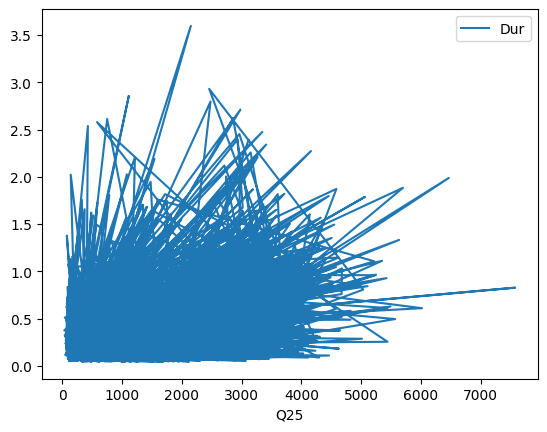

In [33]:
df.plot(x="Q25", y="Dur")

<Axes: title={'center': 'AMVar'}, xlabel='[CallType]'>

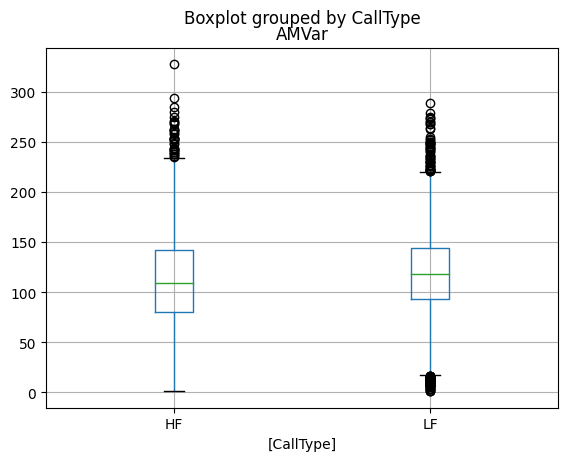

In [8]:
df[["AMVar", "CallType"]].boxplot(by='CallType')

<Axes: title={'center': 'AMExtent'}, xlabel='[CallType]'>

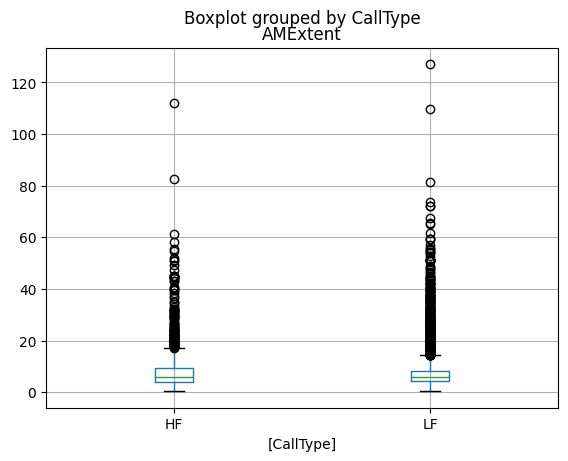

In [9]:
df[["AMExtent", "CallType"]].boxplot(by='CallType')

<Axes: title={'center': 'AMRate'}, xlabel='[CallType]'>

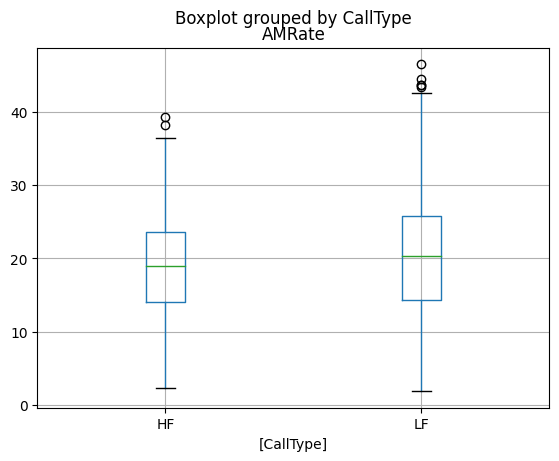

In [10]:
df[["AMRate", "CallType"]].boxplot(by='CallType')

<Axes: title={'center': 'Harmonicity'}, xlabel='[CallType]'>

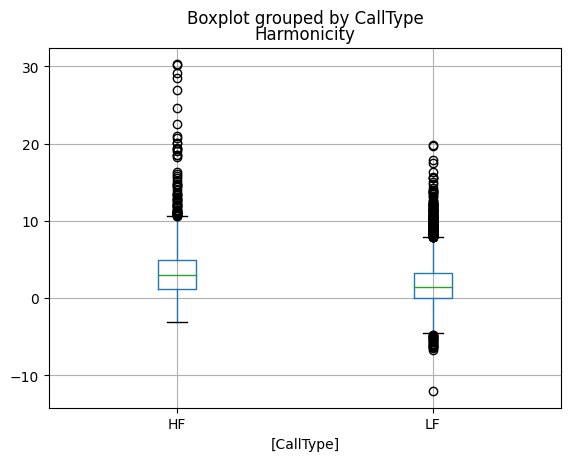

In [11]:
df[["Harmonicity", "CallType"]].boxplot(by='CallType')

In [19]:
df[df.CallType == 'LF'].groupby('AgeCategory').count()

Unnamed: 0  Team  RecordingSite  HousingGroup  LitterID  PigID  \
AgeCategory                                                                   
Finishing           240   240            240             0         0    240   
GrFinishing        1365  1365           1365          1365      1365   1365   
Piglet             2445  2445           2445          2445      2445   2445   
Weaner             1463  1463           1463          1463      1463   1463   

             TestGrpID  Date  AudioFileName   Sex  ...   Q50   Q75  Fpeak  \
AgeCategory                                        ...                      
Finishing          240   240            240     0  ...   240   240    240   
GrFinishing       1365  1365           1365  1365  ...  1365  1365   1365   
Piglet            2445  2445           2445  2177  ...  2445  2445   2445   
Weaner            1463  1463           1463  1463  ...  1463  1463   1463   

              Dur  AMVar  AMRate  AMExtent  Harmonicity  WienEntrMean  \
AgeCategory                                                             
Finishing     240    240     239       239          240           240   
GrFinishing  1365   1365    1365      1365         1365          1365   
Piglet       2445   2393    2326      2326         2445          2445   
Weaner       1463   1463    1461      1461         1463          1463   

             global_filename  
AgeCategory                   
Finishing                240  
GrFinishing             1365  
Piglet                  2445  
Weaner                  1463  

[4 rows x 25 columns]

In [20]:
df[df.CallType == 'HF'].groupby('AgeCategory').count()

Unnamed: 0  Team  RecordingSite  HousingGroup  LitterID  PigID  \
AgeCategory                                                                   
Finishing           289   289            289             0         0    289   
GrFinishing          25    25             25            25        25     25   
Piglet             1131  1131           1131          1131      1131   1131   
Weaner              456   456            456           456       456    456   

             TestGrpID  Date  AudioFileName   Sex  ...   Q50   Q75  Fpeak  \
AgeCategory                                        ...                      
Finishing          289   289            289     0  ...   289   289    289   
GrFinishing         25    25             25    25  ...    25    25     25   
Piglet            1131  1131           1131  1094  ...  1131  1131   1131   
Weaner             456   456            456   456  ...   456   456    456   

              Dur  AMVar  AMRate  AMExtent  Harmonicity  WienEntrMean  \
AgeCategory                                                             
Finishing     289    289     289       289          289           289   
GrFinishing    25     25      25        25           25            25   
Piglet       1131   1103    1078      1078         1131          1131   
Weaner        456    456     440       440          456           456   

             global_filename  
AgeCategory                   
Finishing                289  
GrFinishing               25  
Piglet                  1131  
Weaner                   456  

[4 rows x 25 columns]

In [30]:
6887 + 529

7416

In [31]:
len(df)

7414

In [22]:
import math
split = {}
ad_df = df[df.AgeCategory != 'Piglet']
for f in ['HF', 'LF']:
    split[f] = {}
    split[f]['median_dur'] = ad_df[ad_df.CallType == f]['Dur'].median()
    split[f]['low_median_dur'] = math.floor(split[f]['median_dur']*10)/10
    split[f]['Q25_10'] = ad_df[ad_df.CallType == f]['Q25'].quantile(q=0.1)
    split[f]['Q75_90'] = ad_df[ad_df.CallType == f]['Q75'].quantile(q=0.9)
print(split)

{'HF': {'median_dur': 0.28200000000000003, 'low_median_dur': 0.2, 'Q25_10': 433.27959999999996, 'Q75_90': 7495.7865}, 'LF': {'median_dur': 0.295, 'low_median_dur': 0.2, 'Q25_10': 110.0154, 'Q75_90': 2100.9923000000026}}


In [23]:
import math
split = {}
ad_df = df[df.AgeCategory == 'Piglet']
for f in ['HF', 'LF']:
    split[f] = {}
    split[f]['median_dur'] = ad_df[ad_df.CallType == f]['Dur'].median()
    split[f]['low_median_dur'] = math.floor(split[f]['median_dur']*10)/10
    split[f]['Q25_10'] = ad_df[ad_df.CallType == f]['Q25'].quantile(q=0.1)
    split[f]['Q75_90'] = ad_df[ad_df.CallType == f]['Q75'].quantile(q=0.9)
print(split)

{'HF': {'median_dur': 0.565, 'low_median_dur': 0.5, 'Q25_10': 1147.574, 'Q75_90': 8393.083}, 'LF': {'median_dur': 0.212, 'low_median_dur': 0.2, 'Q25_10': 166.64780000000002, 'Q75_90': 4742.9436}}


In [42]:
split = {}
for f in ['HF', 'LF']:
    split[f] = {}
    split[f]['median_dur'] = df[df.CallType == f]['Dur'].median()
    split[f]['low_median_dur'] = math.floor(split[f]['median_dur']*10)/10
    split[f]['Q25_10'] = df[df.CallType == f]['Q25'].quantile(q=0.1)
    split[f]['Q75_90'] = df[df.CallType == f]['Q75'].quantile(q=0.9)
print(split)

{'HF': {'median_dur': 0.433, 'low_median_dur': 0.4, 'Q25_10': 572.685, 'Q75_90': 8042.013}, 'LF': {'median_dur': 0.262, 'low_median_dur': 0.2, 'Q25_10': 120.7898, 'Q75_90': 4011.3156000000004}}


| Call type | duration | hop | fmin | fmax |
|-----------|----------|-----|------|------|
| HF        | 433      | 149 | 400  | 8000 |
| LF        | 262      | 90  | 100  | 4000 |

In [26]:
ad_df = df[df.AgeCategory != 'Piglet']
ad_df[ad_df.CallType == 'HF']['Dur'].quantile(q=.75)

0.6867500000000001

## Shitty database

In [36]:
import pandas as pd

monitoring_file = "/home/poulpos/pigs-documentary/data/soundwel.csv"

df_shitty = pd.read_csv(monitoring_file)

In [37]:
len(df_shitty[df_shitty.Team == "INRA"])

529

In [8]:
def get_global_filename(row):
    return f"{row.Team}{row.Team}{row.Context}{row.AudioFileName.replace('_', '').replace('-', '')}"

def fix_short(row):
    return row['global'].replace("LongIsolation", "Short").replace("ShortIsolation", "Short").replace("LongReunion", "Short").replace("ShortReunion", "Short")

def fix_cas_cut(row):
    return row['global'].replace("CasCut", "CasCutcut")

df["global"] = df.apply(get_global_filename, axis=1)
df['global'] = df.apply(fix_short, axis=1)
df['global'] = df.apply(fix_cas_cut, axis=1)

In [9]:
chop_path_hf = "/run/media/poulpos/PIGS-KU-BU2/input/430ms/soundwel"
init_sw = "/run/media/poulpos/PIGS-KU-BU1/Soundwel Dataset - Audio and Spectrograms"

In [16]:
orphan[0]


'NMBUNMBUTransit (1).wav'

In [14]:
import glob
orphan = []
for f in glob.glob("*.wav", root_dir=init_sw):
    if (len(df[df['global'] == f]) == 0 
        and len(df[df['global'] == f"{f[:-4]}.WAV"]) == 0):
        orphan.append(f)

In [11]:
len(df[df['Team'] == "NMBU"])

1390

In [15]:
len(df[(df['Team'] == "NMBU") & (df['Context'] != "Barren") & (df['Context'] != "Enriched")]) + len(orphan)

1442

## Better database?

In [32]:
import pandas as pd
import os

monitoring_file = "/home/poulpos/pigs-documentary/SoundwelDatasetKey.csv"

df = pd.read_csv(monitoring_file)

In [20]:
import glob
orphan = []
for f in glob.glob("*.wav", root_dir=init_sw):
    if (len(df[df['Audio Filename'] == f]) == 0 
        and len(df[df['Audio Filename'] == f"{f[:-4]}.WAV"]) == 0):
        orphan.append(f)
print(orphan)

In [28]:
init_sw = "/run/media/poulpos/PIGS-KU-BU1/Soundwel Dataset - Audio and Spectrograms"
orphan = []
for i,row in df.iterrows():
    abs_path = os.path.join(init_sw, row['Audio Filename'])
    if not os.path.exists(abs_path) and not os.path.exists(abs_path.replace(".wav", ".WAV")):
        orphan.append(row['Audio Filename'])
print(orphan)

[]


In [34]:
for i,row in df.iterrows():
    if not row.Type in ['HF', 'LF']:
        print(f"Row {i}, {row['Audio Filename']}")

Row 6150, NMBUNMBUTransit (1).wav
Row 6151, NMBUNMBUTransit (2).wav
Row 6152, NMBUNMBUTransit (3).wav
Row 6153, NMBUNMBUTransit (4).wav
Row 6154, NMBUNMBUTransit (5).wav
Row 6155, NMBUNMBUTransit (6).wav
Row 6156, NMBUNMBUTransit (7).wav
Row 6157, NMBUNMBUTransit (8).wav
Row 6158, NMBUNMBUTransit (9).wav
Row 6159, NMBUNMBUTransit (10).wav
Row 6160, NMBUNMBUTransit (11).wav
Row 6161, NMBUNMBUTransit (12).wav
Row 6162, NMBUNMBUTransit (13).wav
Row 6163, NMBUNMBUTransit (14).wav
Row 6164, NMBUNMBUTransit (15).wav
Row 6165, NMBUNMBUTransit (16).wav
Row 6166, NMBUNMBUTransit (17).wav
Row 6167, NMBUNMBUTransit (18).wav
Row 6168, NMBUNMBUTransit (19).wav
Row 6169, NMBUNMBUTransit (20).wav
Row 6170, NMBUNMBUTransit (21).wav
Row 6171, NMBUNMBUTransit (22).wav
Row 6172, NMBUNMBUTransit (23).wav
Row 6173, NMBUNMBUTransit (24).wav
Row 6174, NMBUNMBUTransit (25).wav
Row 6175, NMBUNMBUTransit (26).wav
Row 6176, NMBUNMBUTransit (27).wav
Row 6177, NMBUNMBUTransit (28).wav
Row 6178, NMBUNMBUTransit (29

### Once

In [ ]:
# import pandas as pd
# import os

# monitoring_file = "/home/poulpos/pigs-documentary/SoundwelDatasetKey.csv"

# df = pd.read_csv(monitoring_file)
# df.rename({'CallType (Freq)': 'call_type', 'Audio Filename': 'filename'}, inplace=True)

## NMBU

In [40]:
import pandas as pd
import os

monitoring_file = "/home/poulpos/pigs-documentary/data_LFcalls_arenatest_running_2021-12-09_postPCA_oneStep.csv"

dmf = pd.read_csv(monitoring_file, sep="\t")

### Expected and measured number of chops

In [35]:
import math
split = {'HF': 0.43, 'LF': 0.26}
def get_n_hf(row):
    return math.ceil(row.Dur/0.43)
def get_n_hf(row):
    return math.ceil(row.Dur/0.26)


df['n_hf'] = df.apply(get_n_hf, axis=1)
df['n_lf'] = df.apply(get_n_lf, axis=1)

ValueError: cannot convert float NaN to integer

In [38]:
import glob
from datetime import datetime
df["n_gen"] = 0
for i, row in df.iterrows():
    if row.CallType == "LF":
        continue
    df.at[i, "n_gen"] = len(glob.glob(f"target-{row.CallType}_{row.global[:-4]}_*",
                                 root_dir=chop_path))
    if i % 100 == 0:
        print(f"{datetime.now()} {i}")


SyntaxError: f-string: invalid syntax (1284217469.py, line 7)

In [14]:
df[df["CallType"] == "HF"][["global_filename", "n_samples", "n_gen"]].head()

global_filename  n_samples  n_gen
0   IASPIASPCShamCuts99p09shamcut007.wav          2      0
1   IASPIASPCShamCuts99p09shamcut006.wav          2      0
2   IASPIASPCShamCuts99p09shamcut004.wav          1      0
4  FBNFBNNovelObject06022014VT14HFs4.wav          1      1
5   IASPIASPCShamCuts99p09shamcut010.wav          1      0

In [15]:
chop_path

'/run/media/poulpos/PIGS-KU-BU2/input/430ms/soundwel'

In [22]:
df.loc[800]

Unnamed: 0                                           800
Team                                                IASP
RecordingSite                                      IASPA
HousingGroup                                         s99
LitterID                                             s99
PigID                                            s99-p02
TestGrpID                                              1
Date                                             1-01-11
AudioFileName                  s99-p02-04-hf-max-29a.wav
AgeCategory                                       Piglet
Sex                                                 male
Context                                         Backtest
ContextCategory                                 Restrain
CallType                                              HF
Valence                                              Neg
Q25                                             1606.507
Q50                                              3735.55
Q75                            

In [18]:
glob.glob(f"target-HF_IASPIASPCShamCuts99p09shamcut006_*",
                                 root_dir=chop_path)

[]

In [24]:
len(pd.unique(df["global_filename"]))

6746

In [25]:
len(df)

7414

In [33]:
pd.unique(df[(df["Team"] != df["RecordingSite"])]["RecordingSite"])

array(['IASPC', 'IASPA', 'IASPB'], dtype=object)

In [28]:
df.head()

Unnamed: 0  Team RecordingSite HousingGroup LitterID    PigID TestGrpID  \
0           0  IASP         IASPC          s99      s99  s99-p09         1   
1           1  IASP         IASPC          s99      s99  s99-p09         1   
2           2  IASP         IASPC          s99      s99  s99-p09         1   
3           3   FBN           FBN          343     3898     1633         1   
4           4   FBN           FBN          337     4477     5056         1   

      Date            AudioFileName AgeCategory  ...     Fpeak    Dur  \
0  4-26-11  s99p09_sham-cut-007.wav      Piglet  ...  3925.411  0.579   
1  4-26-11  s99p09_sham-cut-006.wav      Piglet  ...  3930.226  0.503   
2  4-26-11  s99p09_sham-cut-004.wav      Piglet  ...  3869.114  0.397   
3  3-20-14    20032014_VT5_HFm2.wav      Weaner  ...   355.038  0.361   
4  2-06-14   06022014_VT14_HFs4.wav      Weaner  ...  7478.464  0.089   

     AMVar  AMRate AMExtent  Harmonicity  WienEntrMean  \
0  144.858  18.989    7.629        26.99        -6.730   
1  188.303  13.925   13.523        30.29        -6.595   
2  181.558  13.841   13.118        30.14        -6.144   
3   83.607  34.661    2.412        -1.17        -6.075   
4   31.838   5.632    5.653        20.79        -6.044   

                         global_filename  n_gen  n_samples  
0   IASPIASPCShamCuts99p09shamcut007.wav      0          2  
1   IASPIASPCShamCuts99p09shamcut006.wav      0          2  
2   IASPIASPCShamCuts99p09shamcut004.wav      0          1  
3   FBNFBNNovelObject20032014VT5HFm2.wav      0          2  
4  FBNFBNNovelObject06022014VT14HFs4.wav      1          1  

[5 rows x 28 columns]

In [41]:
import glob
from datetime import datetime
df["n_gen"] = 0
for i, row in df.iterrows():
    if row.CallType == "LF":
        continue
    df.at[i, "n_gen"] = len(glob.glob(f"target-{row.CallType}_{row['global'][:-4]}_*",
                                 root_dir=chop_path))
    if i % 100 == 0:
        print(f"{datetime.now()} {i}")

2023-10-15 16:31:37.277803 0
2023-10-15 16:31:41.220941 600
2023-10-15 16:31:42.005210 700
2023-10-15 16:31:42.905368 800
2023-10-15 16:31:45.947052 1100
2023-10-15 16:31:48.868729 1400
2023-10-15 16:31:51.878839 1700
2023-10-15 16:31:52.802807 1800
2023-10-15 16:31:53.728333 1900
2023-10-15 16:31:56.392284 2200
2023-10-15 16:31:57.076980 2300
2023-10-15 16:31:57.760431 2400
2023-10-15 16:31:59.365053 2600
2023-10-15 16:32:00.004157 2700
2023-10-15 16:32:01.977563 3000
2023-10-15 16:32:03.683161 3300
2023-10-15 16:32:05.137703 3700
2023-10-15 16:32:06.521813 4100
2023-10-15 16:32:06.973366 4300


In [44]:
df[df["CallType"] == "HF"][["global", "n_samples", "n_gen"]].head()

global  n_samples  n_gen
0    IASPIASPShamCuts99p09shamcut007.wav          2      2
1    IASPIASPShamCuts99p09shamcut006.wav          2      2
2    IASPIASPShamCuts99p09shamcut004.wav          1      1
4  FBNFBNNovelObject06022014VT14HFs4.wav          1      1
5    IASPIASPShamCuts99p09shamcut010.wav          1      1

In [46]:
df[df.CallType == 'HF']['n_samples'].sum()

3477

In [47]:
df[df.CallType == 'HF']['n_gen'].sum()

2278

In [50]:
df[(df['n_gen'] < df['n_samples']) & (df['n_gen'] > 0)].head()

Empty DataFrame
Columns: [Unnamed: 0, Team, RecordingSite, HousingGroup, LitterID, PigID, TestGrpID, Date, AudioFileName, AgeCategory, Sex, Context, ContextCategory, CallType, Valence, Q25, Q50, Q75, Fpeak, Dur, AMVar, AMRate, AMExtent, Harmonicity, WienEntrMean, global_filename, n_gen, n_samples, global]
Index: []

[0 rows x 29 columns]

In [52]:
pd.unique(df['CallType'])

array(['HF', 'LF'], dtype=object)

In [53]:
chop_path

'/run/media/poulpos/PIGS-KU-BU2/input/430ms/soundwel'